# Data Visualization

# Apple Health Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from tabulate import tabulate

In [75]:
import warnings
warnings.filterwarnings('ignore')

## Step Count

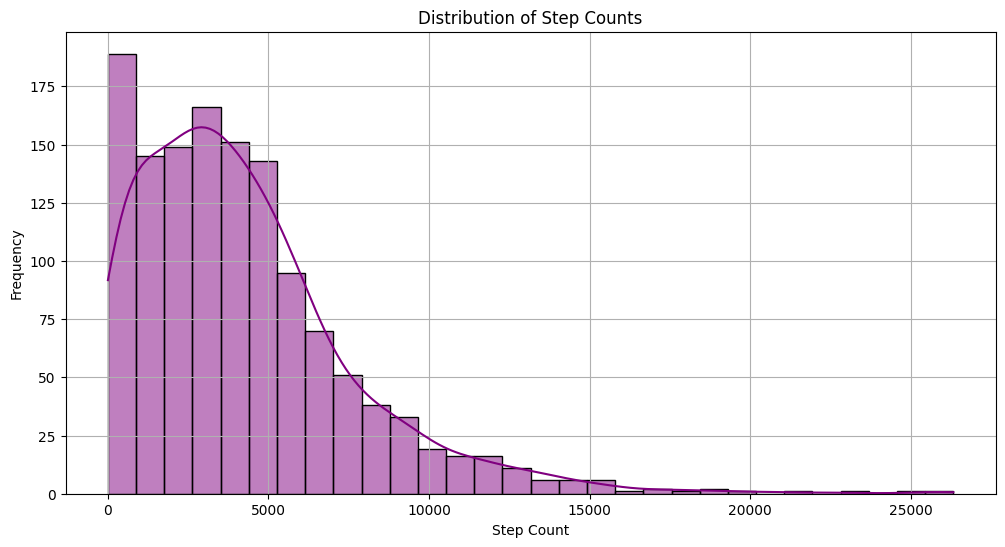

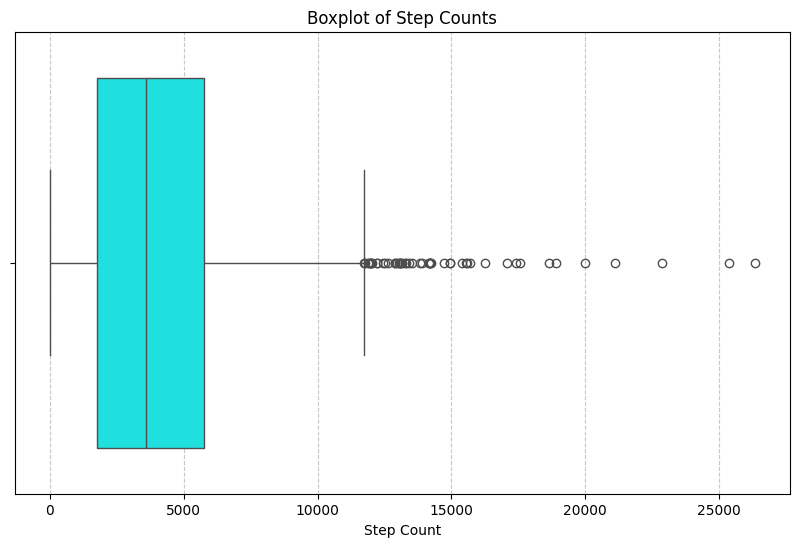

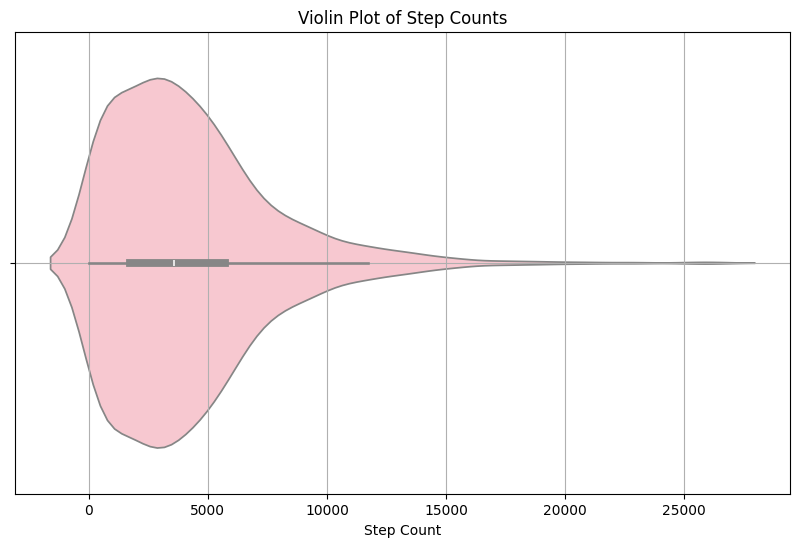

In [76]:
data = pd.read_csv("stepcount_data.csv")

data['date'] = pd.to_datetime(data['date'])

data.rename(columns={'value': 'StepCount'}, inplace=True)

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['StepCount'], bins=30, kde=True, color='purple')
plt.title("Distribution of Step Counts")
plt.xlabel("Step Count")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['StepCount'], color='cyan')
plt.title("Boxplot of Step Counts")
plt.xlabel("Step Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['StepCount'], color='pink')
plt.title("Violin Plot of Step Counts")
plt.xlabel("Step Count")
plt.grid()
plt.show()

### Average Step Count by Month

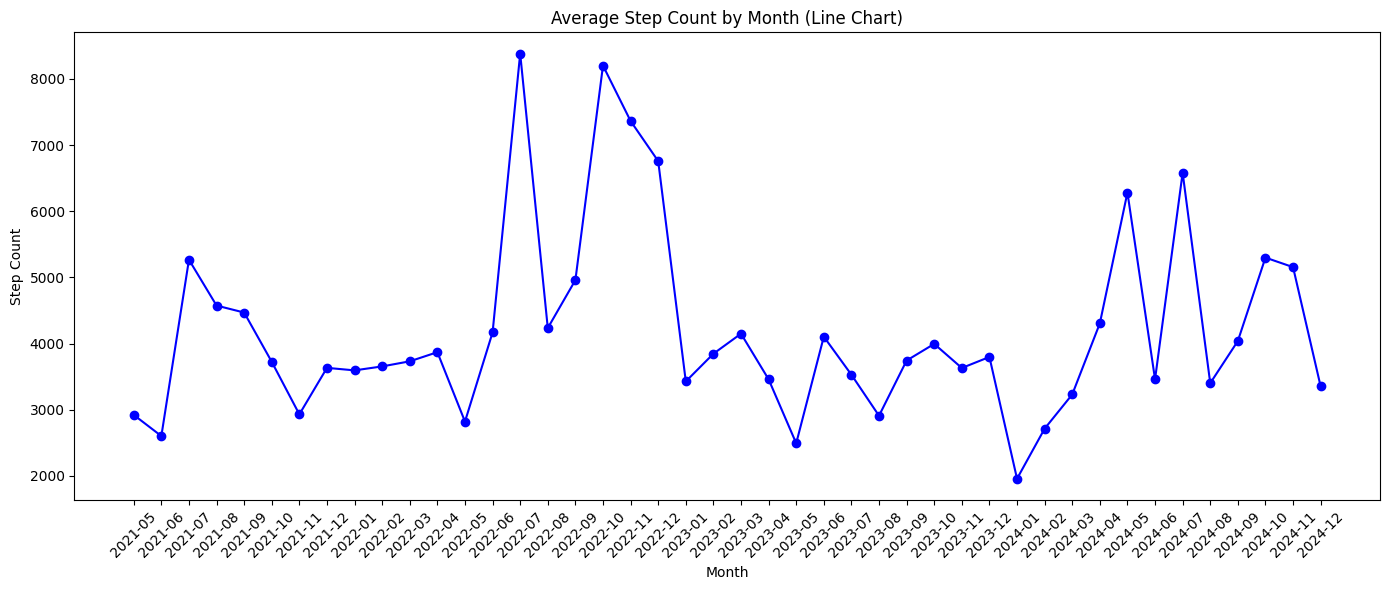

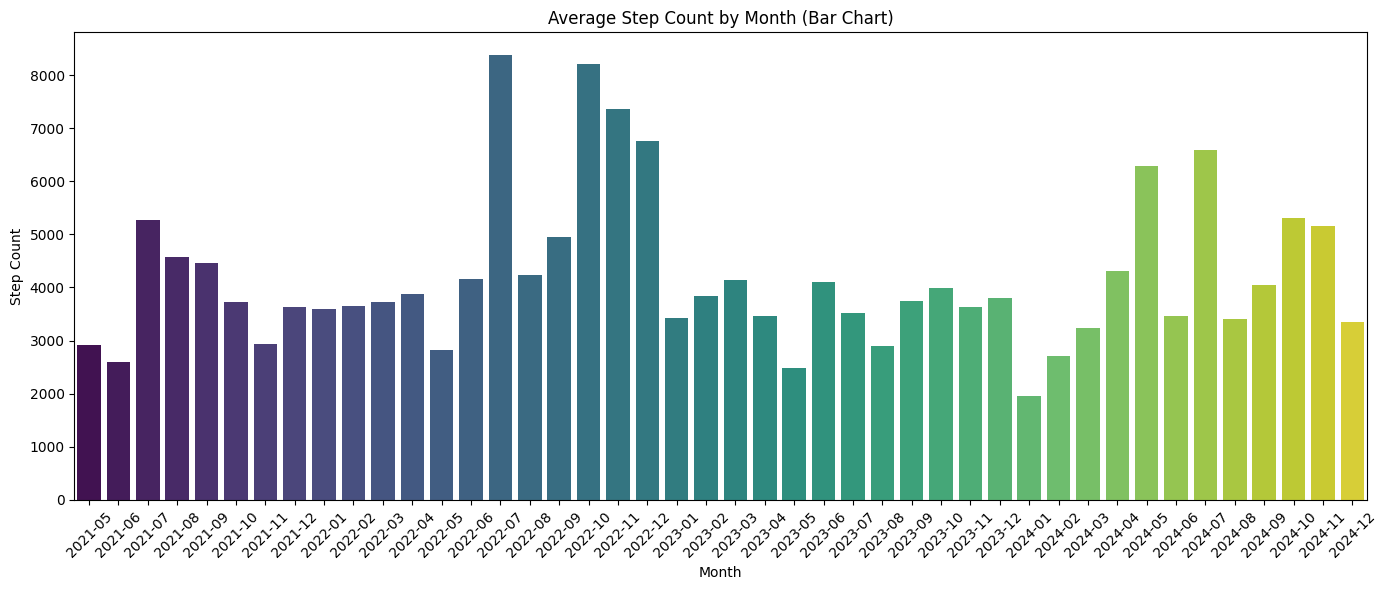

In [77]:
step_count = pd.read_csv('/content/stepcount_data.csv')

step_count['date'] = pd.to_datetime(step_count['date'])
step_count['month'] = step_count['date'].dt.to_period("M")

step_count_grouped = step_count.groupby('month')['value'].mean().reset_index()

# Line chart with markers
plt.figure(figsize=(14, 6))
plt.plot(step_count_grouped['month'].astype(str), step_count_grouped['value'], marker='o', linestyle='-', color='blue')
plt.title('Average Step Count by Month (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(x=step_count_grouped['month'].astype(str), y=step_count_grouped['value'], palette='viridis')
plt.title('Average Step Count by Month (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Flights Climbed

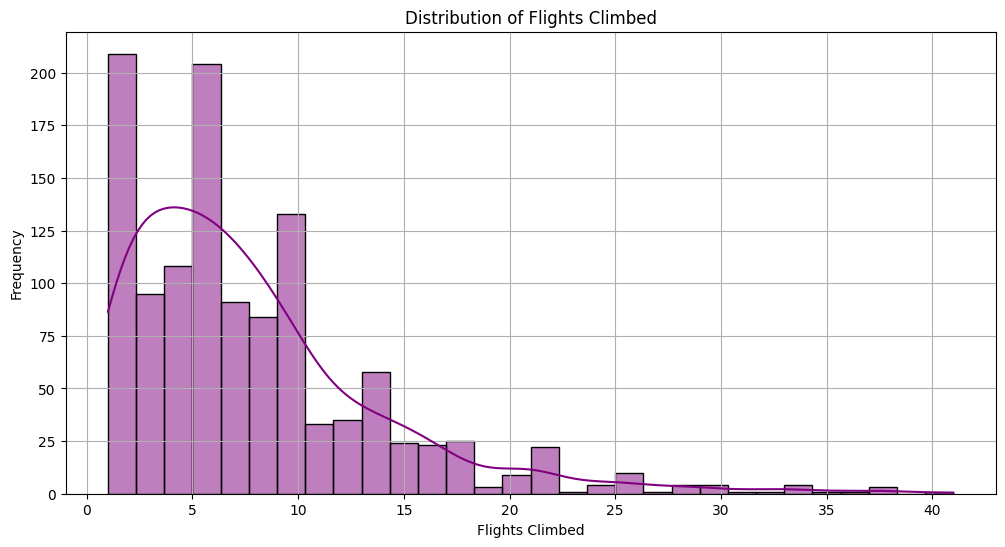

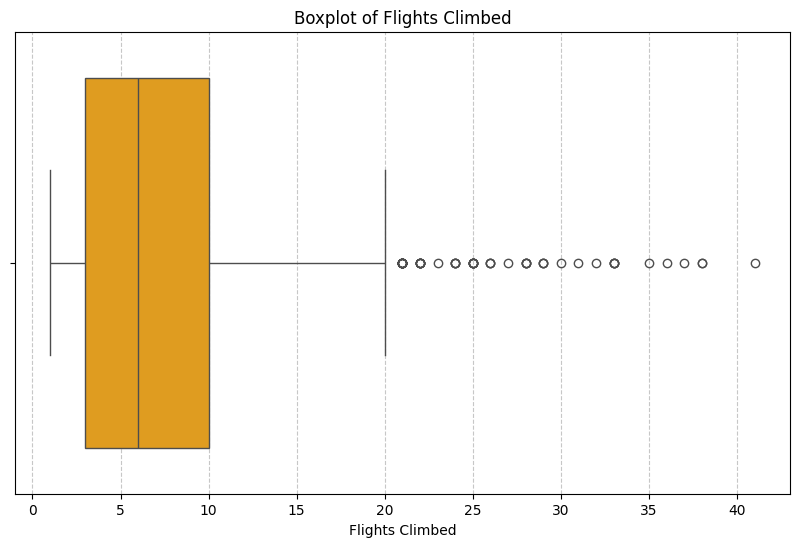

In [78]:
data = pd.read_csv("flightsclimbed_data.csv")

data['date'] = pd.to_datetime(data['date'])

data.rename(columns={'value': 'FlightsClimbed'}, inplace=True)

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['FlightsClimbed'], bins=30, kde=True, color='purple')
plt.title("Distribution of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['FlightsClimbed'], color='orange')
plt.title("Boxplot of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Average Flights Climbed by Month

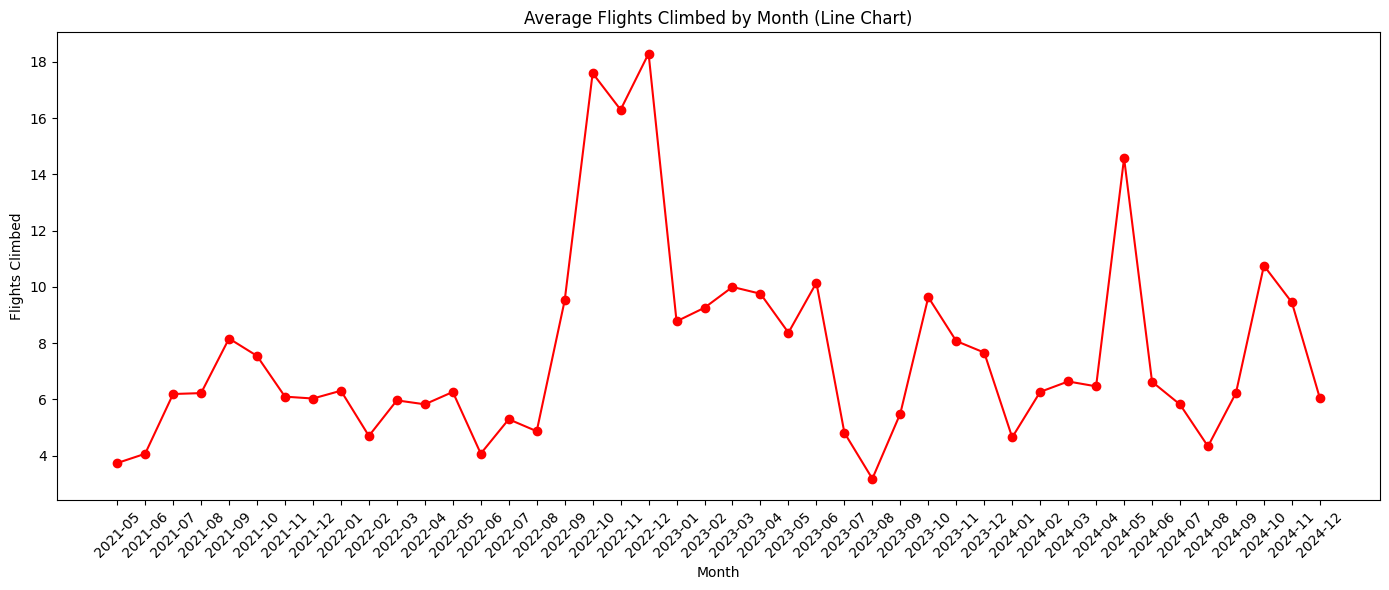

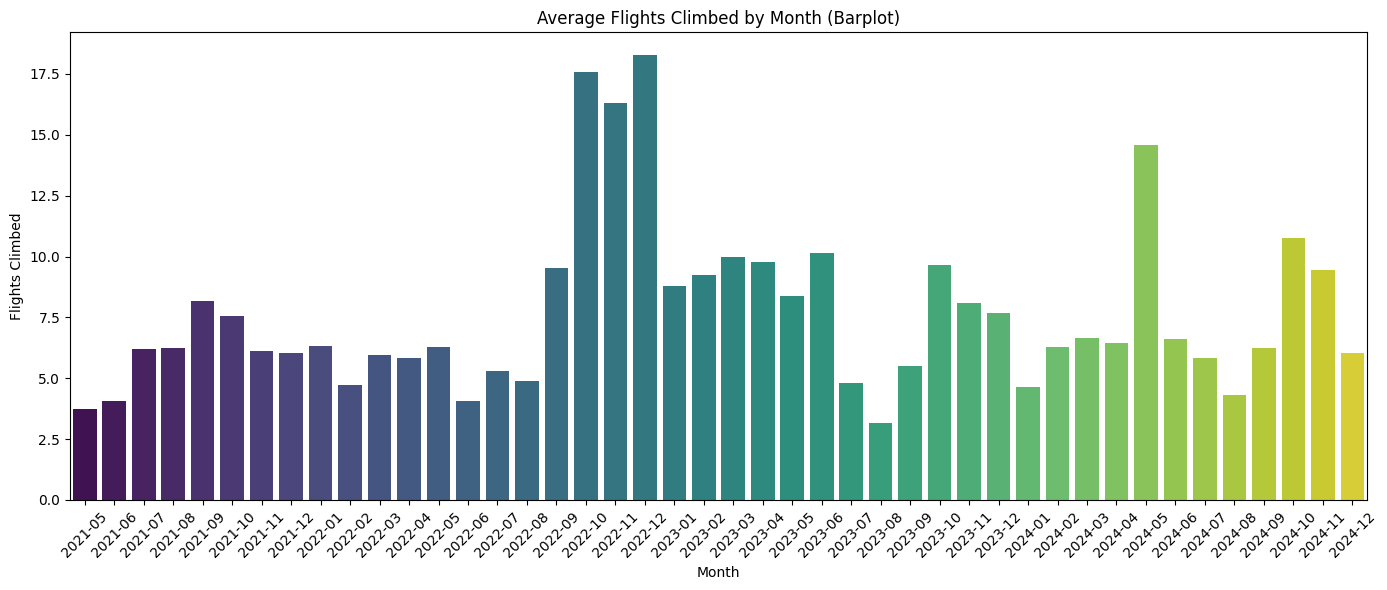

In [79]:
flights_climbed = pd.read_csv('/content/flightsclimbed_data.csv')

flights_climbed['date'] = pd.to_datetime(flights_climbed['date'])
flights_climbed['month'] = flights_climbed['date'].dt.to_period("M")

flights_climbed_grouped = flights_climbed.groupby('month')['value'].mean().reset_index()

# Line chart with markers
plt.figure(figsize=(14, 6))
plt.plot(flights_climbed_grouped['month'].astype(str), flights_climbed_grouped['value'], marker='o', linestyle='-', color='red')
plt.title('Average Flights Climbed by Month (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Flights Climbed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Barplot
plt.figure(figsize=(14, 6))
sns.barplot(x=flights_climbed_grouped['month'].astype(str), y=flights_climbed_grouped['value'], palette='viridis')
plt.title('Average Flights Climbed by Month (Barplot)')
plt.xlabel('Month')
plt.ylabel('Flights Climbed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Walking/Running Distance

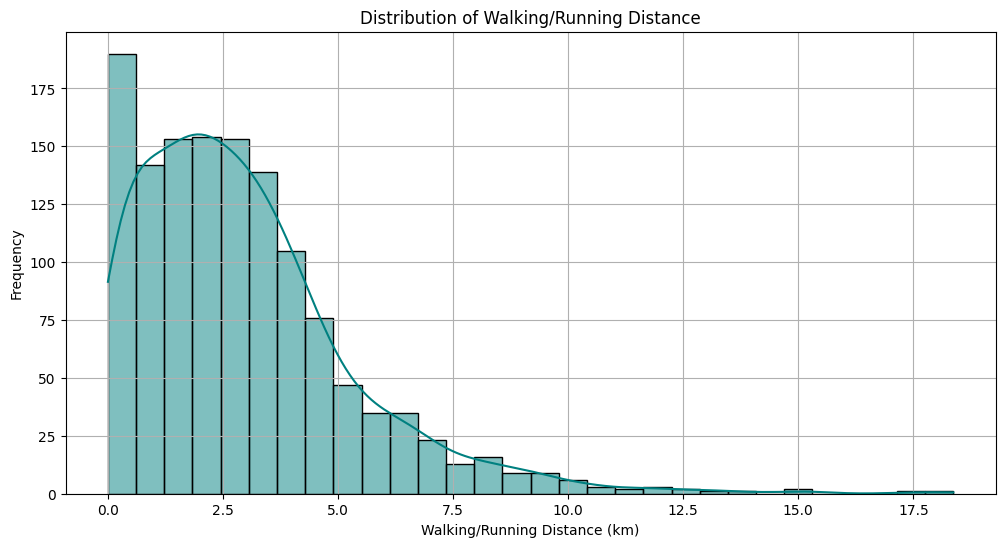

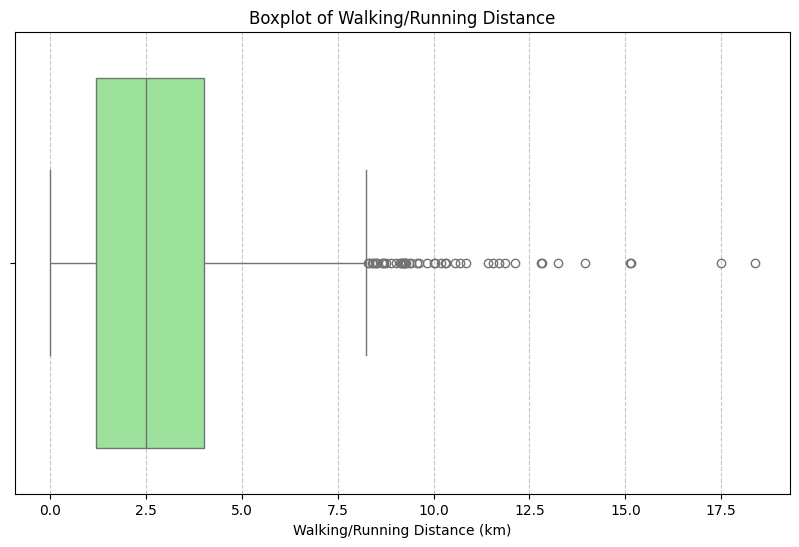

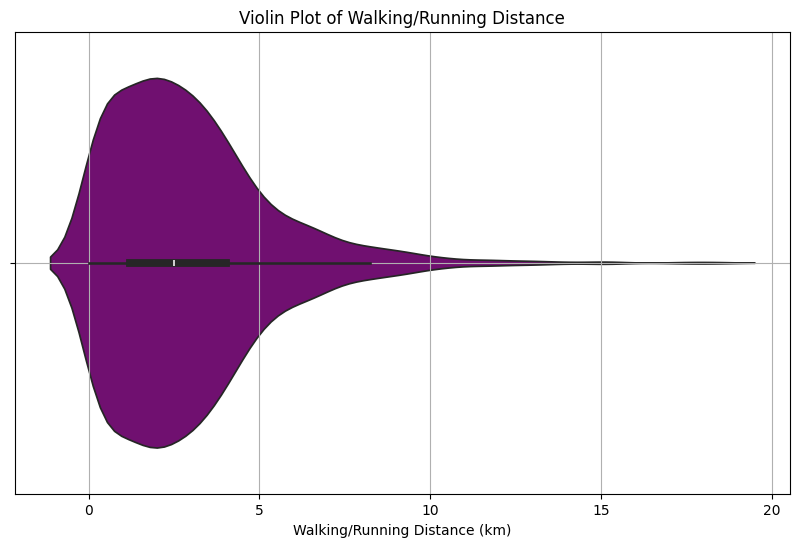

In [80]:
data = pd.read_csv("distancewalkingrunning_data.csv")

data['date'] = pd.to_datetime(data['date'])

data.rename(columns={'value': 'WalkingRunningDistance'}, inplace=True)

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['WalkingRunningDistance'], bins=30, kde=True, color='teal')
plt.title("Distribution of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['WalkingRunningDistance'], color='lightgreen')
plt.title("Boxplot of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['WalkingRunningDistance'], color='purple')
plt.title("Violin Plot of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.grid()
plt.show()


### Average Walking Distance by Month

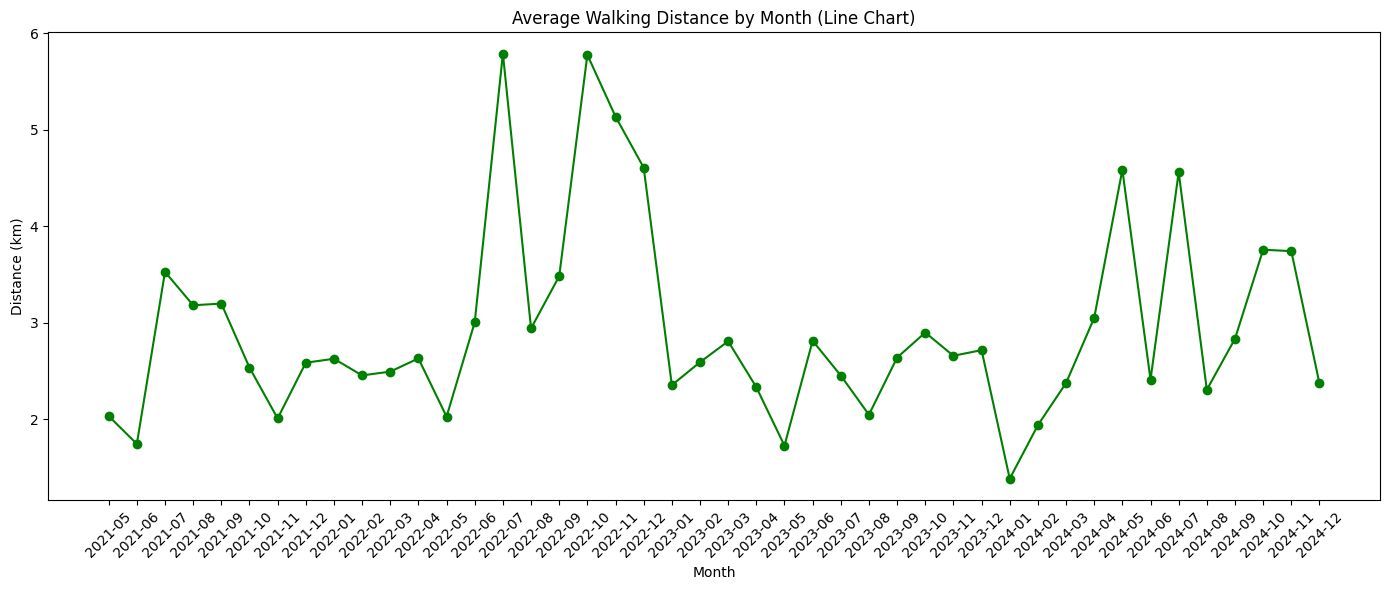

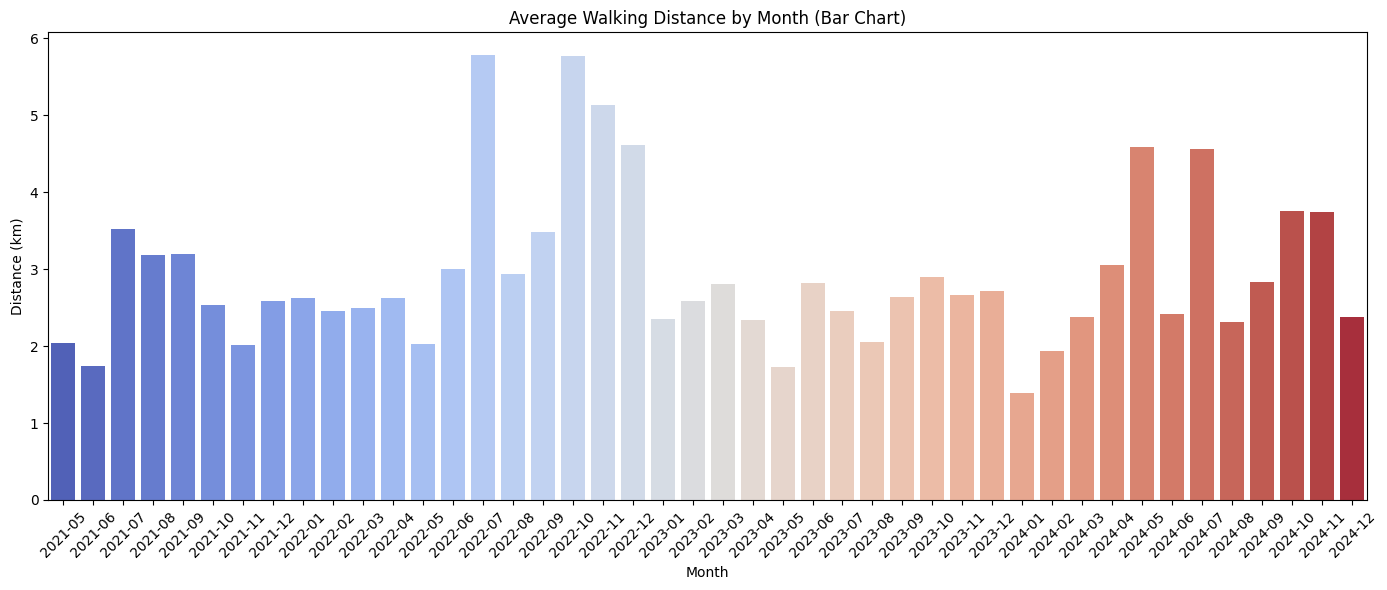

In [81]:
walking_distance = pd.read_csv('/content/distancewalkingrunning_data.csv')

walking_distance['date'] = pd.to_datetime(walking_distance['date'])
walking_distance['month'] = walking_distance['date'].dt.to_period("M")

walking_distance_grouped = walking_distance.groupby('month')['value'].mean().reset_index()

# Line chart with markers
plt.figure(figsize=(14, 6))
plt.plot(walking_distance_grouped['month'].astype(str), walking_distance_grouped['value'], marker='o', linestyle='-', color='green')
plt.title('Average Walking Distance by Month (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(x=walking_distance_grouped['month'].astype(str), y=walking_distance_grouped['value'], palette='coolwarm')
plt.title('Average Walking Distance by Month (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Combined Apple Health Data

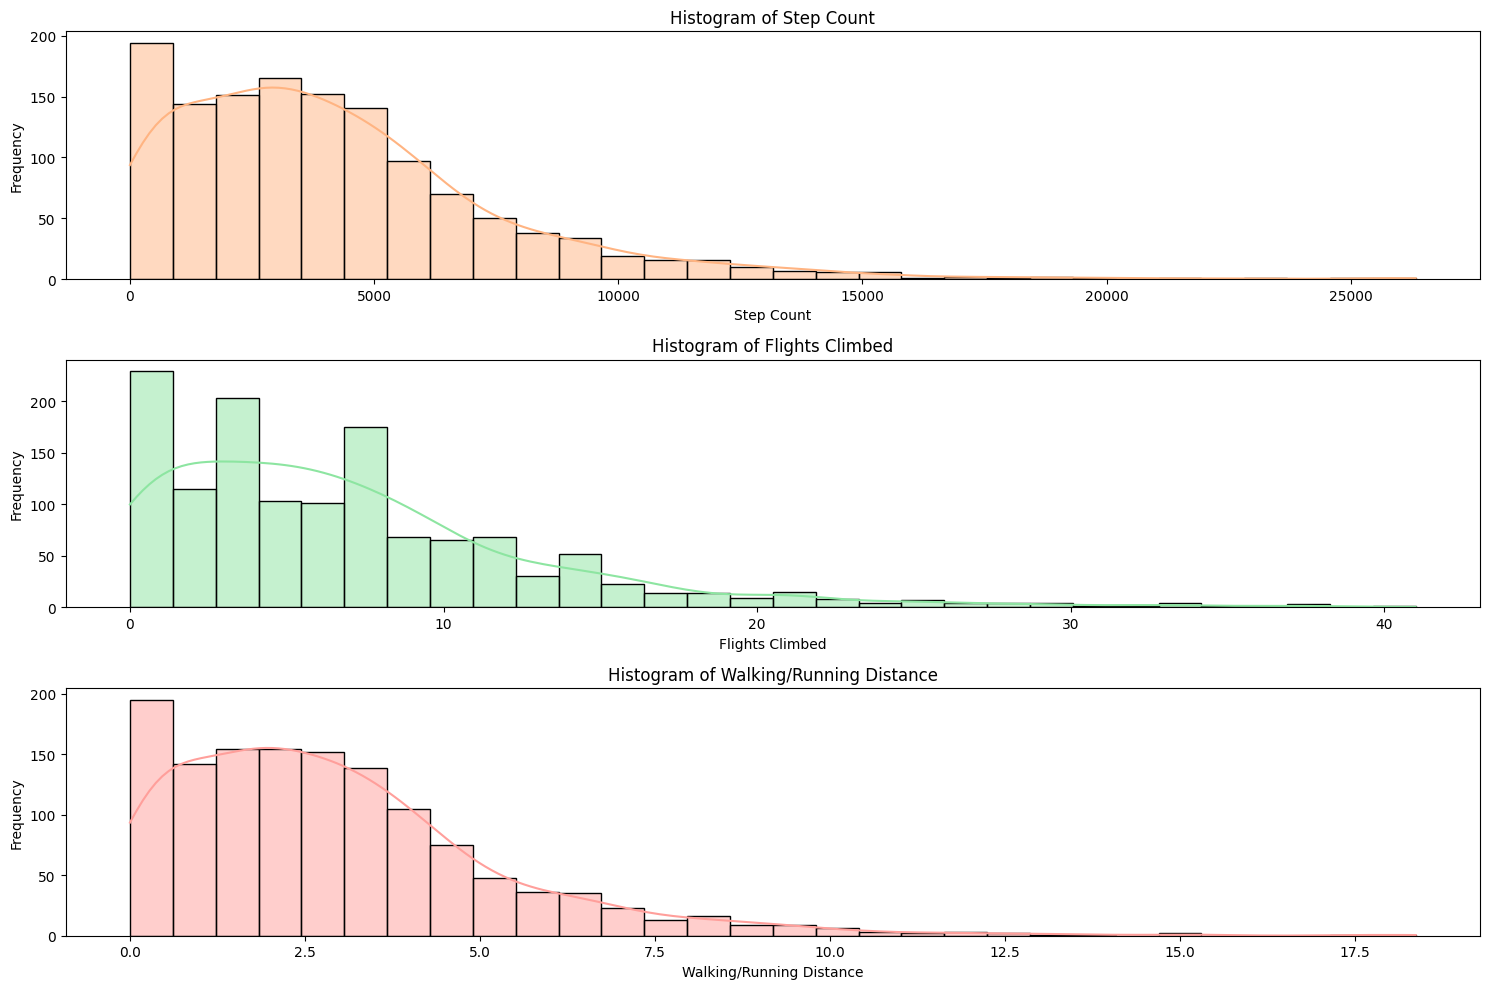

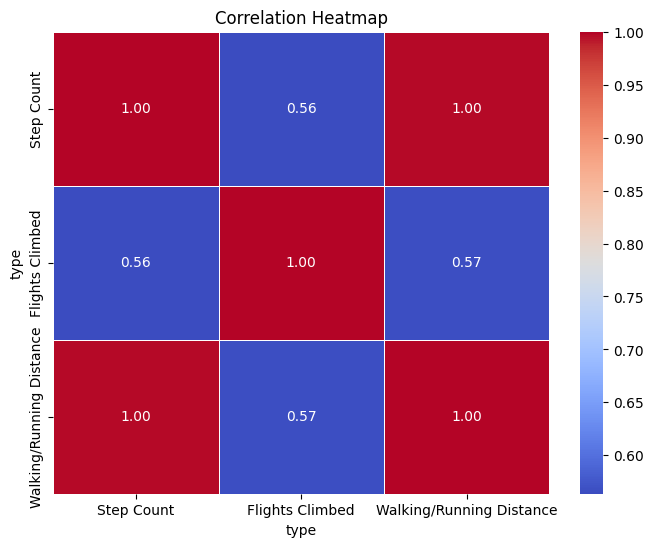

In [82]:
data = pd.read_csv("apple_health_combined_data.csv")

data['date'] = pd.to_datetime(data['date'])

data_pivot = data.pivot(index='date', columns='type', values='value')
data_pivot.reset_index(inplace=True)

data_pivot.rename(columns={
    'StepCount': 'Step Count',
    'FlightsClimbed': 'Flights Climbed',
    'DistanceWalkingRunning': 'Walking/Running Distance'
}, inplace=True)

# Histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Step Count', 'Flights Climbed', 'Walking/Running Distance'], 1):
    plt.subplot(3, 1, i)
    sns.histplot(data_pivot[column], bins=30, kde=True, color=sns.color_palette("pastel")[i])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
correlation_matrix = data_pivot[['Step Count', 'Flights Climbed', 'Walking/Running Distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Period Tracker App

## Period Dates

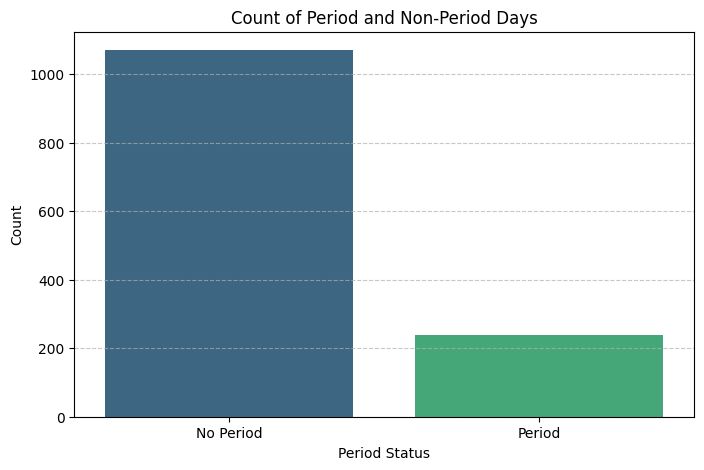

In [83]:
data = pd.read_csv("all_dates_with_period_flags.csv")

data['date'] = pd.to_datetime(data['date'])

data['Period Highlight'] = data['is_period'].replace({1: "Period", 0: "No Period"})

# Bar Chart
period_counts = data['Period Highlight'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=period_counts.index, y=period_counts.values, palette="viridis")
plt.title("Count of Period and Non-Period Days")
plt.xlabel("Period Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Monthly Phases

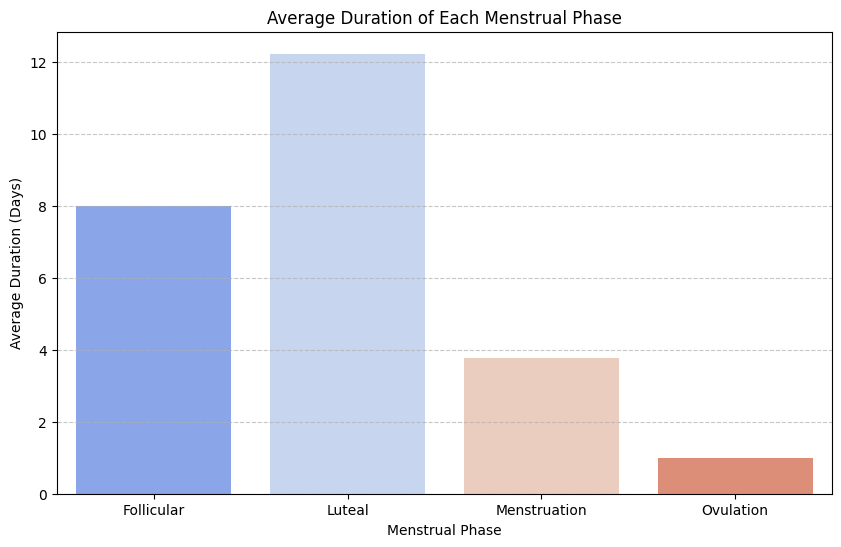

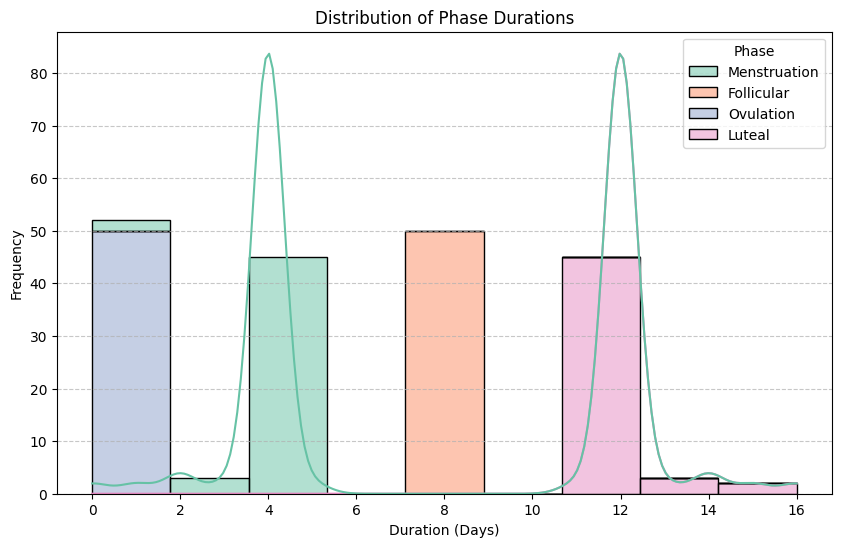

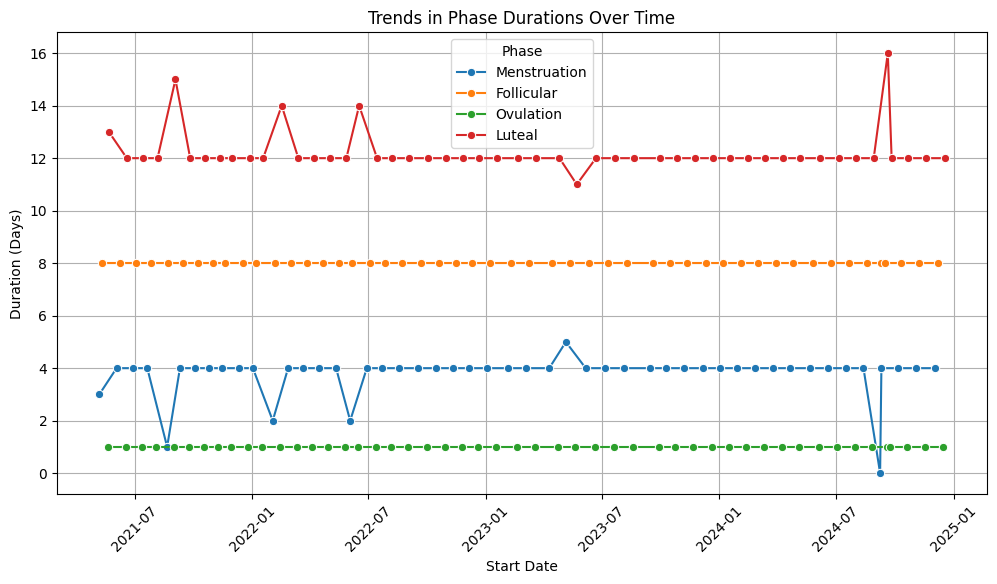

In [84]:
data = pd.read_csv("phase_date_ranges.csv")

data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

invalid_rows = data[data['End Date'] < data['Start Date']]
if not invalid_rows.empty:
    print("Invalid rows detected and removed:")
    print(invalid_rows)
    data = data[data['End Date'] >= data['Start Date']]

data['Duration (Days)'] = (data['End Date'] - data['Start Date']).dt.days

invalid_durations = data[data['Duration (Days)'] < 0]
if not invalid_durations.empty:
    print("Rows with invalid durations detected and removed:")
    print(invalid_durations)
    data = data[data['Duration (Days)'] >= 0]

if data.empty:
    print("No valid data to visualize after cleaning.")
else:
    # Bar Chart: Average Duration of Each Phase
    average_duration = data.groupby('Phase')['Duration (Days)'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_duration, x='Phase', y='Duration (Days)', palette="coolwarm")
    plt.title("Average Duration of Each Menstrual Phase")
    plt.xlabel("Menstrual Phase")
    plt.ylabel("Average Duration (Days)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Histogram: Distribution of Phase Durations
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Duration (Days)', hue='Phase', kde=True, palette="Set2", multiple="stack")
    plt.title("Distribution of Phase Durations")
    plt.xlabel("Duration (Days)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Line Chart: Trends in Phase Durations Over Time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='Start Date', y='Duration (Days)', hue='Phase', marker='o', palette="tab10")
    plt.title("Trends in Phase Durations Over Time")
    plt.xlabel("Start Date")
    plt.ylabel("Duration (Days)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(title="Phase")
    plt.show()

## Combined Period Tracker App (Clue) Data

In [85]:
apple_health = pd.read_csv('/content/apple_health_combined_data.csv')
distance_walking_running = pd.read_csv('/content/distancewalkingrunning_data.csv')
flights_climbed = pd.read_csv('/content/flightsclimbed_data.csv')
step_count = pd.read_csv('/content/stepcount_data.csv')
period_dates = pd.read_csv('/content/all_dates_with_period_flags.csv')
phase_date_ranges = pd.read_csv('/content/phase_date_ranges.csv')

apple_health['date'] = pd.to_datetime(apple_health['date'])
distance_walking_running['date'] = pd.to_datetime(distance_walking_running['date'])
flights_climbed['date'] = pd.to_datetime(flights_climbed['date'])
phase_date_ranges['Start Date'] = pd.to_datetime(phase_date_ranges['Start Date'])
step_count['date'] = pd.to_datetime(step_count['date'])
period_dates['date'] = pd.to_datetime(period_dates['date'])
phase_date_ranges['End Date'] = pd.to_datetime(phase_date_ranges['End Date'])

merged_data = period_dates.copy()
merged_data = merged_data.merge(step_count.rename(columns={'value': 'step_count'}), on='date', how='left')
merged_data = merged_data.merge(distance_walking_running.rename(columns={'value': 'distance_walking_running'}), on='date', how='left')
merged_data = merged_data.merge(flights_climbed.rename(columns={'value': 'flights_climbed'}), on='date', how='left')

def get_phase(date, phases):
    for _, row in phases.iterrows():
        if row['Start Date'] <= date <= row['End Date']:
            return row['Phase']
    return 'Unknown'

merged_data['phase'] = merged_data['date'].apply(lambda x: get_phase(x, phase_date_ranges))

# Visualize Metrics by Phase

Ordering the outputs by the chronological order:

In [86]:
phase_order = ["Menstruation", "Follicular", "Ovulation", "Luteal"]

In [87]:
# Calculate averages by phase
phase_averages = (
    merged_data.groupby('phase')[['step_count', 'distance_walking_running', 'flights_climbed']]
    .mean()
    .reindex(phase_order)
)

### Average Step Count by Phase

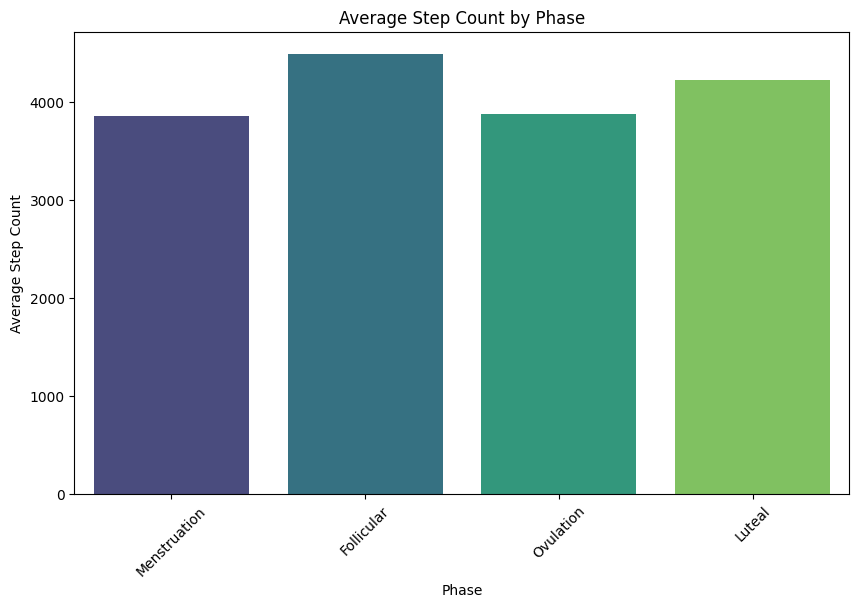

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_averages.index, y=phase_averages['step_count'], palette='viridis')
plt.title('Average Step Count by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Step Count')
plt.xticks(rotation=45)
plt.show()

### Average Flights Climbed by Phase

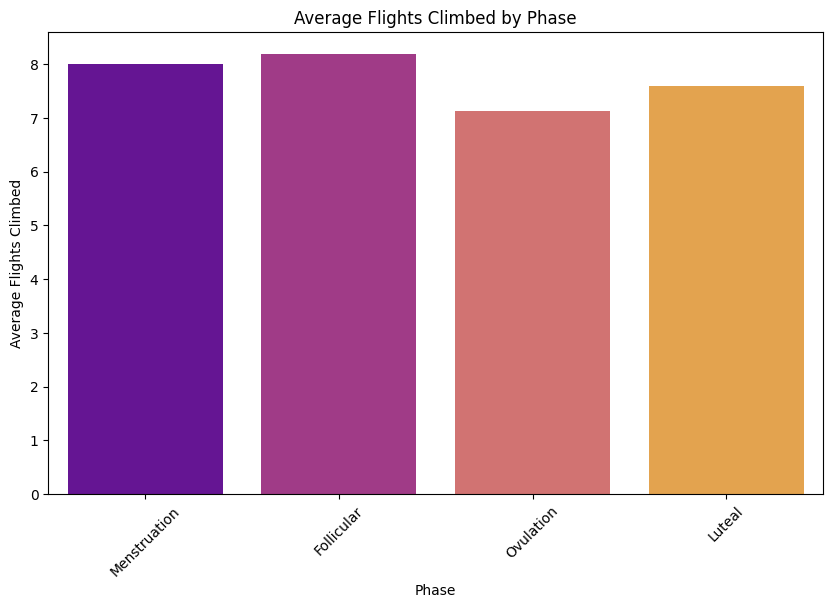

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_averages.index, y=phase_averages['flights_climbed'], palette='plasma')
plt.title('Average Flights Climbed by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Flights Climbed')
plt.xticks(rotation=45)
plt.show()

### Average Distance Walking/Running by Phase

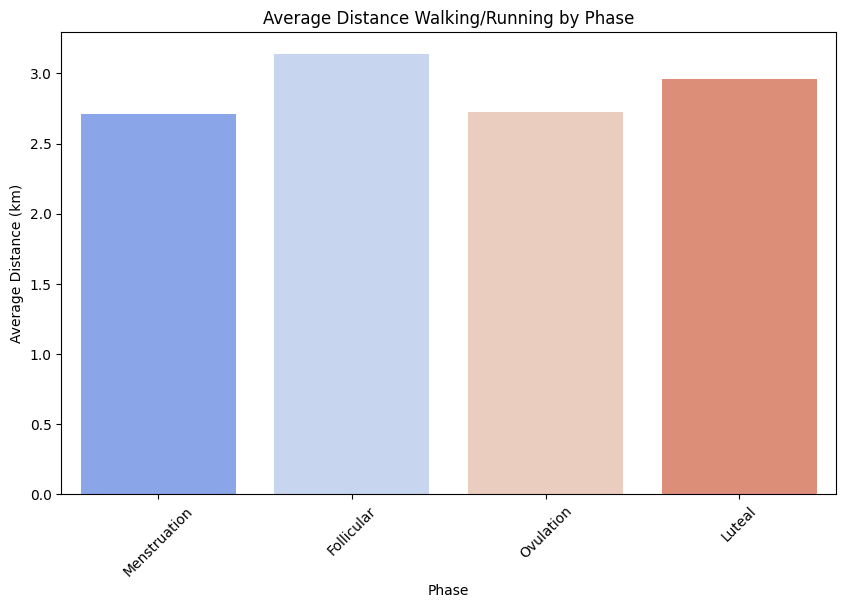

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_averages.index, y=phase_averages['distance_walking_running'], palette='coolwarm')
plt.title('Average Distance Walking/Running by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.show()

## Hypothesis Testing

## Step Counts in Menstruation & Ovulation Phases



**Hypothesis**: Compare Step Counts Between Menstruation and Ovulation Phases

**Null Hypothesis**: The mean step count is the same for Menstruation and Ovulation phases.

**Alternative Hypothesis**: The mean step count is different for Menstruation and Ovulation phases.

In [92]:
menstruation_steps = merged_data[merged_data['phase'] == 'Menstruation']['step_count'].dropna()
ovulation_steps = merged_data[merged_data['phase'] == 'Ovulation']['step_count'].dropna()

# Perform a two-tailed t-test to compare step counts
t_stat, p_value = ttest_ind(menstruation_steps, ovulation_steps, equal_var=False)

# Display results
print("Hypothesis: Compare Step Counts Between Menstruation and Ovulation Phases")
print("Null Hypothesis: The mean step count is the same for Menstruation and Ovulation phases.")
print("Alternative Hypothesis: The mean step count is different for Menstruation and Ovulation phases.")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Reject Null Hypothesis: {p_value < 0.05}")

Hypothesis: Compare Step Counts Between Menstruation and Ovulation Phases
Null Hypothesis: The mean step count is the same for Menstruation and Ovulation phases.
Alternative Hypothesis: The mean step count is different for Menstruation and Ovulation phases.
T-Statistic: -0.048207949770670694
P-Value: 0.9615946844922557
Reject Null Hypothesis: False


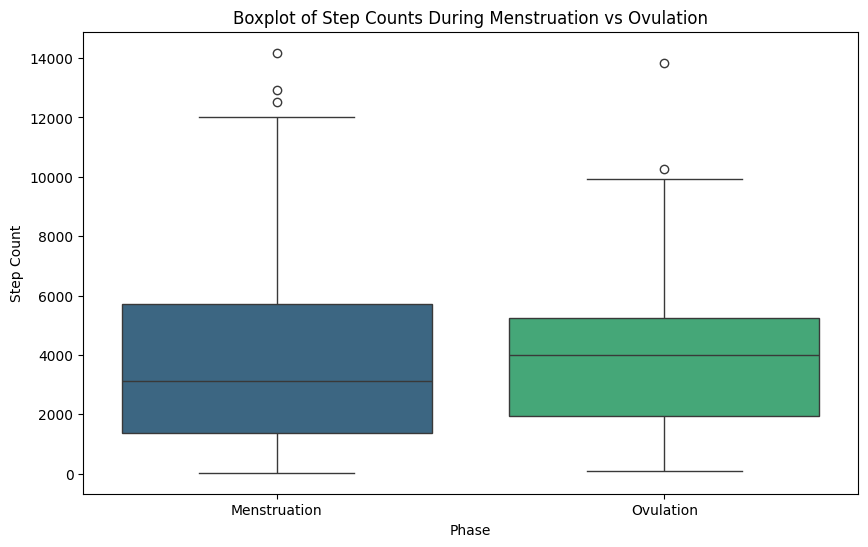

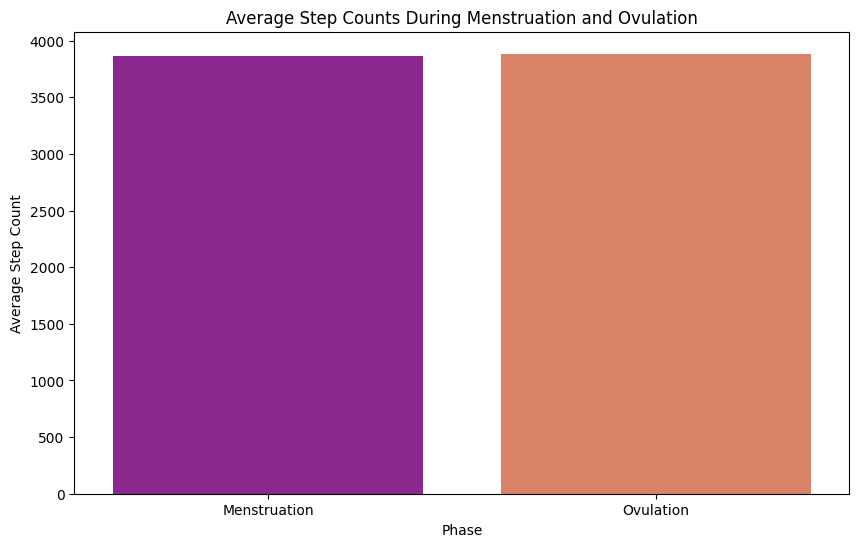

In [93]:
# Boxplots for step counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[merged_data['phase'].isin(['Menstruation', 'Ovulation'])],
            x='phase', y='step_count', palette='viridis', order=["Menstruation", "Ovulation"])
plt.title('Boxplot of Step Counts During Menstruation vs Ovulation')
plt.xlabel('Phase')
plt.ylabel('Step Count')
plt.show()

# Bar chart of average step counts
average_steps = merged_data.groupby('phase')['step_count'].mean().loc[['Menstruation', 'Ovulation']]
plt.figure(figsize=(10, 6))
sns.barplot(x=average_steps.index, y=average_steps.values, palette='plasma')
plt.title('Average Step Counts During Menstruation and Ovulation')
plt.xlabel('Phase')
plt.ylabel('Average Step Count')
plt.show()

## Flights Climbed in Ovulation Phase & Other Phases

**Hypothesis**: Flights climbed are higher during Ovulation compared to other phases.

**Null Hypothesis**: The mean flights climbed is the same for Ovulation and other phases.

**Alternative Hypothesis**: The mean flights climbed is different for Ovulation and other phases.

In [94]:
ovulation_flights = merged_data[merged_data['phase'] == 'Ovulation']['flights_climbed'].dropna()
other_phases_flights = merged_data[merged_data['phase'] != 'Ovulation']['flights_climbed'].dropna()

# Perform a two-tailed t-test to compare flights climbed
t_stat3, p_value3 = ttest_ind(ovulation_flights, other_phases_flights, equal_var=False)

# Display results
print("Hypothesis: Compare Flights Climbed During Ovulation Phase vs Other Phases")
print("Null Hypothesis: The mean flights climbed is the same for Ovulation and other phases.")
print("Alternative Hypothesis: The mean flights climbed is different for Ovulation and other phases.")
print(f"T-Statistic: {t_stat3}")
print(f"P-Value: {p_value3}")
print(f"Reject Null Hypothesis: {p_value3 < 0.05}")

Hypothesis: Compare Flights Climbed During Ovulation Phase vs Other Phases
Null Hypothesis: The mean flights climbed is the same for Ovulation and other phases.
Alternative Hypothesis: The mean flights climbed is different for Ovulation and other phases.
T-Statistic: -1.1915320458739371
P-Value: 0.23612500249557872
Reject Null Hypothesis: False


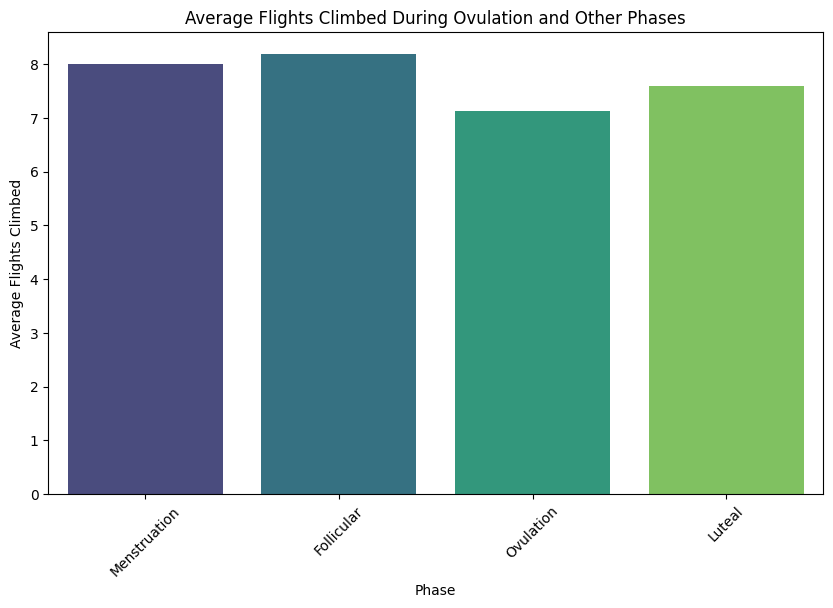

In [95]:
# Bar chart of average flights climbed
average_flights = merged_data.groupby('phase')['flights_climbed'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_flights.index, y=average_flights.values, palette='viridis', order=["Menstruation", "Follicular", "Ovulation", "Luteal"])
plt.title('Average Flights Climbed During Ovulation and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Flights Climbed')
plt.xticks(rotation=45)
plt.show()

## Walking/Running Distance in Menstruation Phase & Other Phases

**Hypothesis**: Walking/Running Distance is Lower During Menstruation Than Other Phases.

**Null Hypothesis**: The mean walking/running distance is the same for Menstruation and other phases.

**Alternative Hypothesis**: The mean walking/running distance is lower during Menstruation.

In [96]:
menstruation_distance = merged_data[merged_data['phase'] == 'Menstruation']['distance_walking_running'].dropna()
other_phases_distance = merged_data[merged_data['phase'] != 'Menstruation']['distance_walking_running'].dropna()

# Perform a two-tailed t-test to compare walking/running distances
t_stat4, p_value4 = ttest_ind(menstruation_distance, other_phases_distance, equal_var=False)

# Display results
print("Hypothesis: Walking/Running Distance is Lower During Menstruation Than Other Phases")
print("Null Hypothesis: The mean walking/running distance is the same for Menstruation and other phases.")
print("Alternative Hypothesis: The mean walking/running distance is lower during Menstruation.")
print(f"T-Statistic: {t_stat4}")
print(f"P-Value: {p_value4}")
print(f"Reject Null Hypothesis: {p_value4 < 0.05}")

Hypothesis: Walking/Running Distance is Lower During Menstruation Than Other Phases
Null Hypothesis: The mean walking/running distance is the same for Menstruation and other phases.
Alternative Hypothesis: The mean walking/running distance is lower during Menstruation.
T-Statistic: -1.3664700410111486
P-Value: 0.17357812635630132
Reject Null Hypothesis: False


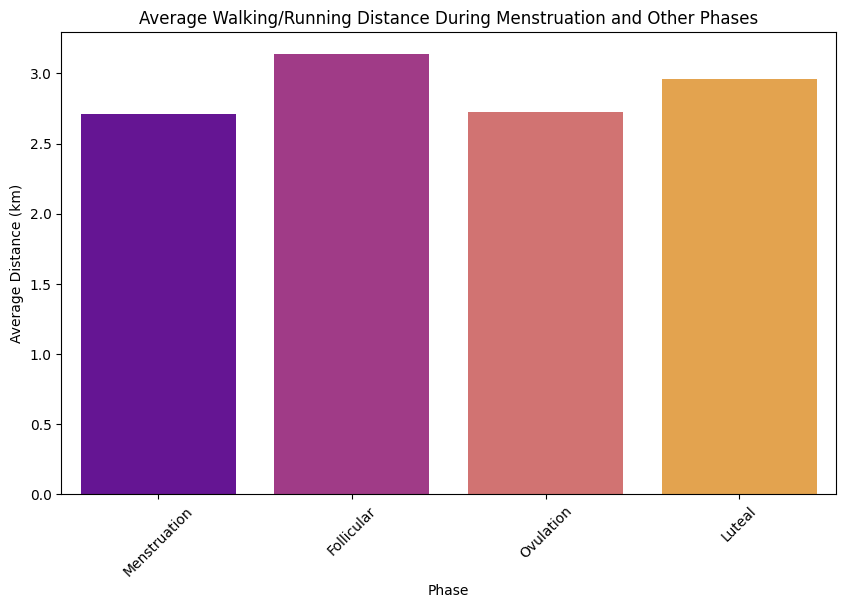

In [97]:
# Bar chart of average walking/running distance
average_distance = merged_data.groupby('phase')['distance_walking_running'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_distance.index, y=average_distance.values, palette='plasma', order=["Menstruation", "Follicular", "Ovulation", "Luteal"])
plt.title('Average Walking/Running Distance During Menstruation and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.show()

# Machine Learning

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report

Regression RMSE: 323.69
Regression MAE: 221.36
Cross-Validation RMSE: 413.47


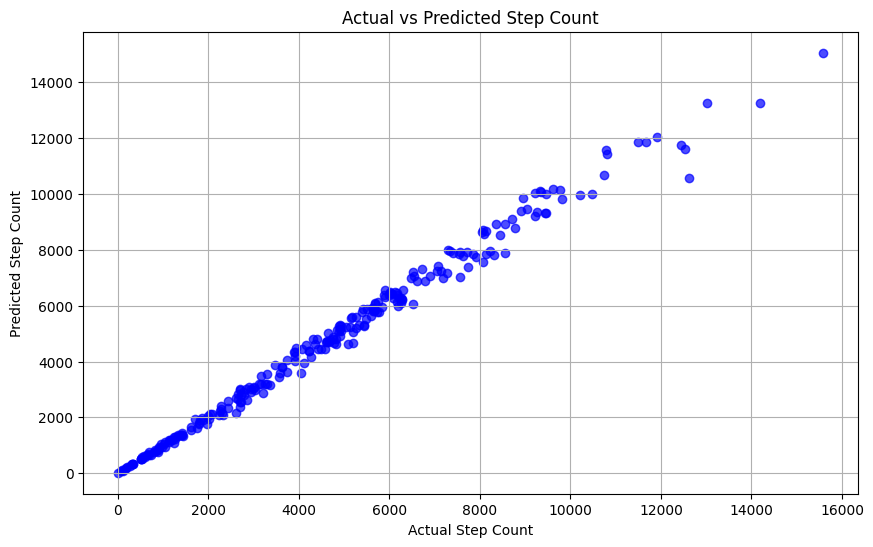

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.15      0.16        46
           1       0.33      0.33      0.33        82
           2       0.06      0.05      0.06        20
           3       0.44      0.47      0.45       111

    accuracy                           0.34       259
   macro avg       0.25      0.25      0.25       259
weighted avg       0.33      0.34      0.33       259



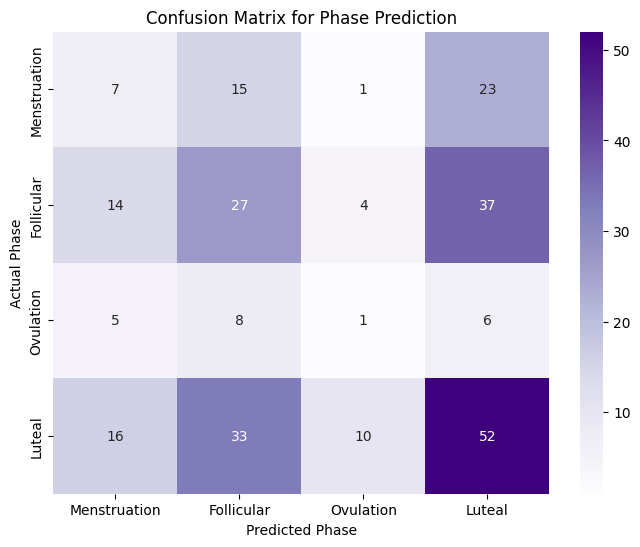

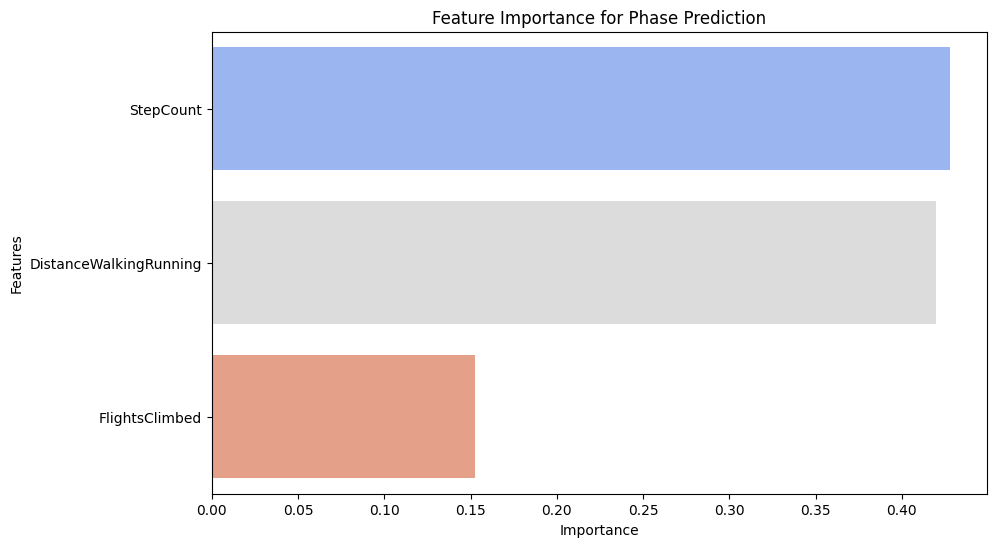

In [113]:
metrics_data = pd.read_csv('/content/apple_health_combined_data.csv', parse_dates=['date'])
phases_data = pd.read_csv('/content/phase_date_ranges.csv', parse_dates=['Start Date', 'End Date'])

metrics_pivot = metrics_data.pivot(index='date', columns='type', values='value').reset_index()

metrics_pivot['Phase'] = None
for _, row in phases_data.iterrows():
    mask = (metrics_pivot['date'] >= row['Start Date']) & (metrics_pivot['date'] <= row['End Date'])
    metrics_pivot.loc[mask, 'Phase'] = row['Phase']

metrics_pivot = metrics_pivot.dropna(subset=['Phase'])

phase_mapping = {"Menstruation": 0, "Follicular": 1, "Ovulation": 2, "Luteal": 3}
metrics_pivot['Phase'] = metrics_pivot['Phase'].map(phase_mapping)


X_reg = metrics_pivot[['FlightsClimbed', 'DistanceWalkingRunning']]
y_reg = metrics_pivot['StepCount']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42, shuffle=False)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression RMSE: {rmse:.2f}")
print(f"Regression MAE: {mae:.2f}")

cv_scores = cross_val_score(reg, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores).mean():.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='blue')
plt.title("Actual vs Predicted Step Count")
plt.xlabel("Actual Step Count")
plt.ylabel("Predicted Step Count")
plt.grid()
plt.show()


X_class = metrics_pivot[['StepCount', 'FlightsClimbed', 'DistanceWalkingRunning']]
y_class = metrics_pivot['Phase']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42, shuffle=False)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

y_pred_class = clf.predict(X_test_class)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

conf_mat = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=phase_mapping.keys(), yticklabels=phase_mapping.keys())
plt.title("Confusion Matrix for Phase Prediction")
plt.xlabel("Predicted Phase")
plt.ylabel("Actual Phase")
plt.show()

feature_importance_class = pd.Series(clf.feature_importances_, index=X_class.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_class.values, y=feature_importance_class.index, palette='coolwarm')
plt.title("Feature Importance for Phase Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()